In [30]:
import pandas as pd
train_stop = pd.read_csv('../data/curated/train_distance_duration.csv')
school = pd.read_csv('../data/curated/school_distance_duration.csv')
mall = pd.read_csv('../data/curated/mall_distances_durations(final).csv')
park = pd.read_csv('../data/curated/park_distances_durations(final).csv')
CBD = pd.read_csv('../data/curated/cbd_distances_durations(final).csv')
rent = pd.read_csv('../rent_data/rent_cleaned.csv')
population_growth = pd.read_csv('../data/curated/population_postcode_SA2.csv')
affluence = pd.read_csv('../data/curated/VIC_yearly_income_poa.csv')

In [31]:
affluence

,Unnamed: 0,Postcode,Longitude,Latitude,SA2 name,Median income in 2014-15,Median income in 2015-16,Median income in 2016-17,Median income in 2017-18,Median income in 2018-19,Median income in 2019-2020,Median income in 2020-2021,Median income in 2021-2022,Median income in 2022-2023,Median income in 2023-2024,Median income in 2024-2025,Median Income growth rate
0,0,3000,144.956776,-37.817403,Melbourne,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4,27225.36,26697.75,0.980621
1,1,8001,144.765920,-38.365017,Melbourne,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4,27225.36,26697.75,0.980621
2,2,8003,144.957000,-37.818300,Melbourne,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4,27225.36,26697.75,0.980621
3,3,8006,144.959306,-37.809701,Melbourne,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4,27225.36,26697.75,0.980621
4,4,8009,144.964531,-37.817201,Melbourne,32697,31242,28068,28806,30024,29442.15,28871.58,28312.07,27763.4,27225.36,26697.75,0.980621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,692,3990,145.501279,-38.455399,Wonthaggi - Inverloch,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29,44893.06,45967.97,1.023944
693,693,3991,145.466781,-38.483041,Wonthaggi - Inverloch,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29,44893.06,45967.97,1.023944
694,694,3992,145.534315,-38.569135,Wonthaggi - Inverloch,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29,44893.06,45967.97,1.023944
695,695,3995,145.630713,-38.578071,Wonthaggi - Inverloch,36316,36159,36496,38060,39884,40838.97,41816.81,42818.06,43843.29,44893.06,45967.97,1.023944


In [32]:
rent = rent.rename(columns={'listingSlug':'rent_address'})
rent_1bathroom = rent[rent.bathrooms == 1]
rent_2bathroom = rent[rent.bathrooms == 2]
rent_3bathroom = rent[rent.bathrooms == 3]
rent_4bathroom = rent[rent.bathrooms == 4]
rent_bathroom = rent[rent.bathrooms > 4]
rent_1bedroom = rent[rent.bedrooms == 1]
rent_2bedroom = rent[rent.bedrooms == 2]
rent_3bedroom = rent[rent.bedrooms == 3]
rent_4bedroom = rent[rent.bedrooms == 4]
rent_bedroom = rent[rent.bedrooms > 4]

In [33]:
rent_1car = rent[rent.carspaces == 1]
rent_2car = rent[rent.carspaces == 2]
rent_car = rent[rent.carspaces > 2]
print(rent_1car.shape)
print(rent_2car.shape)
print(rent_car.shape)
print(rent_1bathroom.shape)
print(rent_2bathroom.shape)
print(rent_3bathroom.shape)
print(rent_4bathroom.shape)
print(rent_bathroom.shape)
print(rent_1bedroom.shape)
print(rent_2bedroom.shape)
print(rent_3bedroom.shape)
print(rent_4bedroom.shape)
print(rent_bedroom.shape)

(701, 14)
(282, 14)
(45, 14)
(781, 14)
(386, 14)
(48, 14)
(5, 14)
(0, 14)
(266, 14)
(553, 14)
(283, 14)
(103, 14)
(15, 14)


Inverse index

In [34]:
park["min_duration"]=1/(park["min_duration"]/60)
mall["min_duration"]=1/(mall["min_duration"]/60)
school["min_duration"]=1/(school["min_duration"]/60)
train_stop["min_duration"]=1/(train_stop["min_duration"]/60)
CBD["min_duration"]=1/(CBD["min_duration"]/60)

In [35]:
park["min_distance"]=1/park["min_distance"]
mall["min_distance"]=1/mall["min_distance"]
school["min_distance"]=1/school["min_distance"]
train_stop["min_distance"]=1/train_stop["min_distance"]
CBD["min_distance"]=1/CBD["min_distance"]

Rename Column name

In [39]:
school = school.rename(columns={'min_distance':'school_distance(m)', 'min_duration':'school_duration(min)'})
mall = mall.rename(columns={'min_distance':'mall_distance(m)', 'min_duration':'mall_duration(min)'})
park = park.rename(columns={'min_distance':'park_distance(m)', 'min_duration':'park_duration(min)'})
train_stop = train_stop.rename(columns={'min_distance':'train_stop_distance(m)', 'min_duration':'train_stop_duration(min)'})
population_growth = population_growth.rename(columns={'Postcode':'postcode','average change %':'population_growth_rate'})
CBD = CBD.rename(columns={'min_distance':'CBD_distance(m)', 'min_duration':'CBD_duration(min)'})
affluence = affluence.rename(columns={'Postcode':'postcode'})

In [40]:
population_growth

,Unnamed: 0,S/T name,SA2 name,2001,2002,2003,2004,2005,2006,2007,...,change 2011-2021 %,Area km2,population density 2021(persons/km2),population_growth_rate,2022,2023,2024,postcode,Longitude,Latitude
0,0,Victoria,Alfredton,5756,6092,6293,6480,6648,6761,7034,...,99.0,52.7,319.2,1.055274,17753.0,18734.0,19770.0,3350,143.864505,-37.571941
1,1,Victoria,Ballarat,11497,11708,12015,12189,12269,12356,12408,...,-2.3,12.4,975.5,1.002498,12106.0,12136.0,12166.0,3353,144.835743,-37.777800
2,2,Victoria,Ballarat,11497,11708,12015,12189,12269,12356,12408,...,-2.3,12.4,975.5,1.002498,12106.0,12136.0,12166.0,3354,143.867158,-37.560917
3,3,Victoria,Ballarat,11497,11708,12015,12189,12269,12356,12408,...,-2.3,12.4,975.5,1.002498,12106.0,12136.0,12166.0,3355,143.825610,-37.530285
4,4,Victoria,Buninyong,5320,5399,5557,5620,5857,6037,6131,...,7.5,51.6,140.2,1.015562,7345.0,7459.0,7575.0,3357,143.883416,-37.653945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,587,Victoria,Moyne - West,8317,8387,8450,8487,8517,8601,8694,...,10.4,2037.8,4.9,1.009076,10053.0,10144.0,10236.0,3287,142.319530,-38.059868
588,588,Victoria,Moyne - West,8317,8387,8450,8487,8517,8601,8694,...,10.4,2037.8,4.9,1.009076,10053.0,10144.0,10236.0,3304,141.952156,-38.182084
589,589,Victoria,Warrnambool - North,17053,17449,17726,17937,18172,18528,18877,...,13.0,62.4,359.9,1.013879,22774.0,23090.0,23410.0,3280,142.482889,-38.378840
590,590,Victoria,Warrnambool - North,17053,17449,17726,17937,18172,18528,18877,...,13.0,62.4,359.9,1.013879,22774.0,23090.0,23410.0,3281,142.630109,-38.254454


Calculate average of diatance and duration

In [41]:
school = school[['postcode', 'school_distance(m)', 'school_duration(min)']].groupby('postcode').mean()
school = school.reset_index(drop=False)
mall = mall[['postcode', 'mall_distance(m)', 'mall_duration(min)']].groupby('postcode').mean()
mall = mall.reset_index(drop=False)
park = park[['postcode', 'park_distance(m)', 'park_duration(min)']].groupby('postcode').mean()
park = park.reset_index(drop=False)
CBD = CBD[['postcode', 'CBD_distance(m)', 'CBD_duration(min)']].groupby('postcode').mean()
CBD = CBD.reset_index(drop=False)
train_stop = train_stop[['postcode', 'train_stop_distance(m)', 'train_stop_duration(min)']].groupby('postcode').mean()
train_stop = train_stop.reset_index(drop=False)

Merge each external feature with mean value

In [49]:
rent_school = pd.merge(rent_2bedroom, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population_growth_rate']],affluence[['postcode','Median income in 2022-2023']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
train_cbd = pd.merge(train_stop, CBD, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_cbd, how='inner', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='inner', on='postcode')

In [50]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)

(553, 16)
(144, 5)
(553, 20)
(553, 24)
(336, 26)


In [55]:
external_feature

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,...,mall_distance(m),mall_duration(min),park_distance(m),park_duration(min),train_stop_distance(m),train_stop_duration(min),CBD_distance(m),CBD_duration(min),population_growth_rate,Median income in 2022-2023
0,4,450.0,VIC,ApartmentUnitFlat,1,2,2,Melbourne Region,MONTMORENCY,3094,...,0.000280,0.130862,0.000300,0.163854,0.000041,0.027942,0.000038,0.025164,1.002906,66352.9
1,18,710.0,VIC,ApartmentUnitFlat,2,2,1,Melbourne Region,ARMADALE,3143,...,0.000722,0.358241,0.000235,0.133612,0.000104,0.060399,0.000111,0.067082,1.004608,77992.43
2,112,650.0,VIC,House,1,2,0,Melbourne Region,ARMADALE,3143,...,0.000722,0.358241,0.000235,0.133612,0.000104,0.060399,0.000111,0.067082,1.004608,77992.43
3,419,400.0,VIC,ApartmentUnitFlat,1,2,0,Melbourne Region,ARMADALE,3143,...,0.000722,0.358241,0.000235,0.133612,0.000104,0.060399,0.000111,0.067082,1.004608,77992.43
4,964,500.0,VIC,House,1,2,0,Melbourne Region,ARMADALE,3143,...,0.000722,0.358241,0.000235,0.133612,0.000104,0.060399,0.000111,0.067082,1.004608,77992.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,981,310.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,HEATHERTON,3202,...,0.000282,0.132042,0.000381,0.151149,0.000039,0.026785,0.000042,0.028977,1.017813,61157.61
332,1035,450.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,DINGLEY VILLAGE,3172,...,0.000303,0.214556,0.000388,0.178170,0.000031,0.025021,0.000032,0.024580,1.000793,58273.21
333,1093,500.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,SPRINGVALE,3171,...,0.000308,0.146698,0.000139,0.072921,0.000033,0.028895,0.000032,0.028085,1.009888,40058.69
334,1186,480.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,PARKVILLE,3052,...,0.000421,0.223195,0.000361,0.165607,0.000241,0.131720,0.000130,0.071959,1.017541,55903.16


In [52]:
#external_feature.iloc[:,1:].to_csv('../data/curated/feature_selection.csv')

Correlation map with 2 bedroom

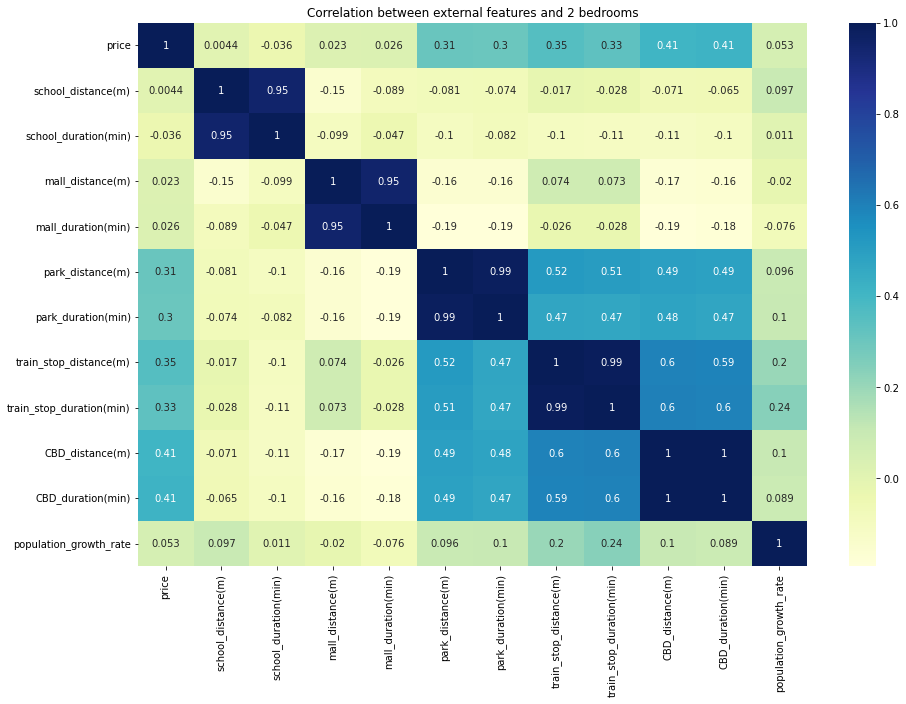

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)","CBD_distance(m)","CBD_duration(min)",'population_growth_rate','Median income in 2022-2023']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features and 2 bedrooms")
plt.savefig("../plots/external_correlation_2bedrooms.png")
plt.show()

In [15]:
rent_school = pd.merge(rent_1car, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population_growth_rate']],affluence[['postcode','weekly_income']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
train_cbd = pd.merge(train_stop, CBD, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_cbd, how='inner', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='inner', on='postcode')

In [16]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)

(701, 16)
(144, 5)
(701, 20)
(701, 24)
(454, 26)


Correlation map with 1 car spaces

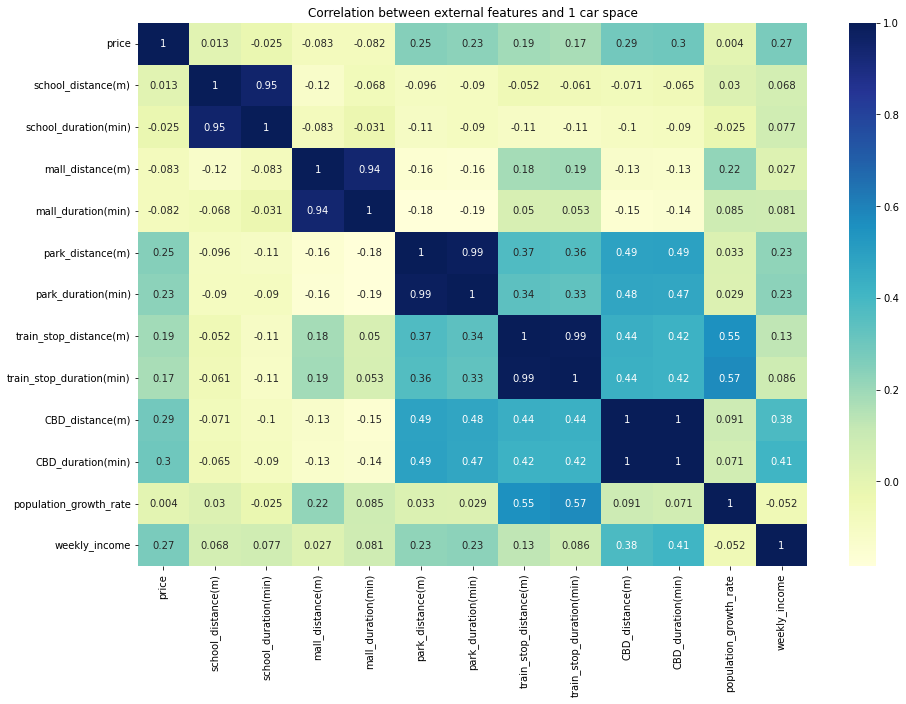

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)","CBD_distance(m)","CBD_duration(min)",'population_growth_rate','weekly_income']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features and 1 car space")
plt.savefig("../plots/external_correlation_1carspace.png")
plt.show()

In [18]:
rent_school = pd.merge(rent_1bathroom, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population_growth_rate']],affluence[['postcode','weekly_income']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
train_cbd = pd.merge(train_stop, CBD, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_cbd, how='inner', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='inner', on='postcode')

In [19]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)

(781, 16)
(144, 5)
(781, 20)
(781, 24)
(498, 26)


Correlation map with 1 bathroom

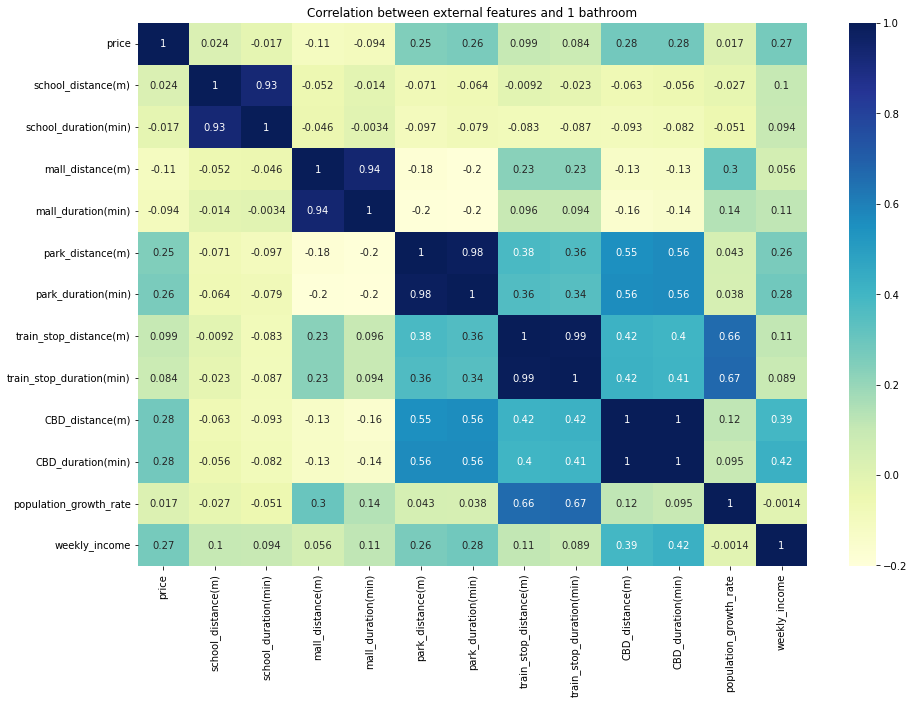

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)","CBD_distance(m)","CBD_duration(min)",'population_growth_rate','weekly_income']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features and 1 bathroom")
plt.savefig("../plots/external_correlation_1bathroom.png")
plt.show()